In [1]:
# Import modules to access netcdf files and plot data

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import dask
from dask.distributed import Client, LocalCluster

In [2]:
cluster = LocalCluster()
client = Client(cluster)

/home/home01/phydrm/miniconda3/envs/default/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37015 instead
  warnings.warn(


In [4]:
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:43764/status,
Status: running,Using processes: True
Dashboard: http://127.0.0.1:43764/status,Workers: 8
Total threads: 40,Total memory: 187.37 GiB
Comm: tcp://127.0.0.1:44754,Workers: 8
Dashboard: http://127.0.0.1:43764/status,Total threads: 40
Started: 1 minute ago,Total memory: 187.37 GiB
Comm: tcp://127.0.0.1:41401,Total threads: 5
Dashboard: http://127.0.0.1:35338/status,Memory: 23.42 GiB
Nanny: tcp://127.0.0.1:45793,


In [3]:
client.dashboard_link

# note: to see the dashboard you will need to run another shell to open a port to view it.
# e.g., if client.dashboard_link returns http://127.0.0.1:43764/status then
# use ssh -L 43764:localhost:43764 user_name@login1.arc4.leeds.ac.uk

'http://127.0.0.1:37015/status'

In [4]:
## output possible at /gpfs/csfs1/cesm/collections/S2Sfcst/POSTPROC/

data_dir = "/resstore/b0243/Data/S2Sfcst_postproc/T/2022/"

f1= "05/T_70Lwaccm6_02may202200z_d01_d46_m*.nc"

# Open the ensemble of forecasts
ds1 = xr.open_mfdataset(data_dir+f1, parallel=True, concat_dim='realization', combine='nested')

In [5]:
print(ds1['lev_p'].sel(lev_p = 0.001, method='Nearest').values)
print(ds1['lev_p'].sel(lev_p = 0.0001, method='Nearest').values)

0.0010000000474974513
9.999999747378752e-05


"When EISCAT 3D Stage 1 is commissioned it will consist of one transmit and receive site in Skibotn, Norway (69.340◦ N, 20.313◦ E) and two receive-only sites in Kaiseniemi, Sweden (68.267◦ N, 19.448◦ E) and Karesuvanto, Finland (68.463◦ N,22.458◦ E)."

In [6]:
print(ds1['lat'].sel(lat = 69, method='Nearest').values)
print(ds1['lon'].sel(lon = 20, method='Nearest').values)

69.26701570680629
20.0


In [12]:
t = ds1['T'].sel(lat = 69, lon = 20, lev_p = 0.01, method='Nearest').compute()

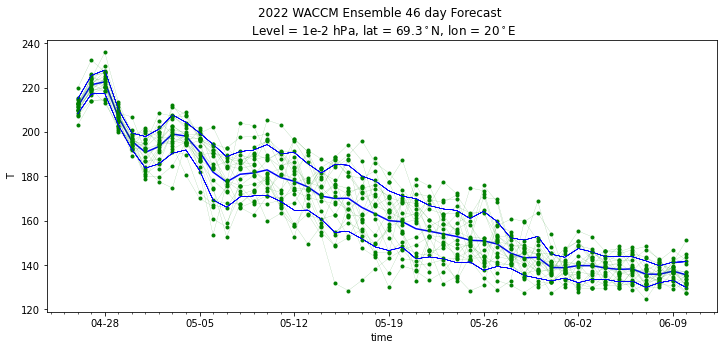

In [13]:
tmean = t.mean(dim='realization')
tstd = t.std(dim='realization')

tmean.plot(figsize=(12,5),color='b')
for i in np.arange(21):
    t[i,:].plot(marker='.',linestyle=' ', color='g')
    t[i,:].plot(linewidth=0.1, color='g')
    (tmean+tstd).plot(color='b',linewidth=0.2)
    (tmean-tstd).plot(color='b',linewidth=0.2)

ax = plt.gca()
ax.set_title("2022 WACCM Ensemble 46 day Forecast \n "+\
             "Level = 1e-2 hPa, lat = 69.3$^\circ$N, lon = 20$^\circ$E")

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())

plt.savefig('T_0.01hPa_69N_20E.png')
plt.show()

In [14]:
data_dir = "/resstore/b0243/Data/S2Sfcst_postproc/U/2022/"

f2= "05/U_70Lwaccm6_02may202200z_d01_d46_m*.nc"

# Open the ensemble of forecasts
ds2 = xr.open_mfdataset(data_dir+f2, parallel=True, concat_dim='realization', combine='nested')

In [15]:
u = ds2['U'].sel(lat = 69, lon = 20, lev_p = 0.01, method='Nearest').compute()

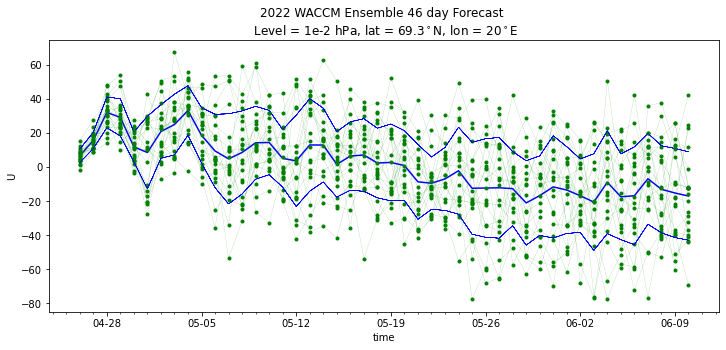

In [11]:
umean = u.mean(dim='realization')
ustd = u.std(dim='realization')

umean.plot(figsize=(12,5),color='b')

for i in np.arange(21):
    u[i,:].plot(marker='.',linestyle=' ', color='g')
    u[i,:].plot(linewidth=0.1, color='g')
    (umean+ustd).plot(color='b',linewidth=0.2)
    (umean-ustd).plot(color='b',linewidth=0.2)

ax = plt.gca()
ax.set_title("2022 WACCM Ensemble 46 day Forecast \n "+\
             "Level = 1e-2 hPa, lat = 69.3$^\circ$N, lon = 20$^\circ$E")

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())

plt.savefig('U_0.01hPa_69N_20E.png')

plt.show()

In [26]:
client.shutdown

<bound method Client.shutdown of <Client: 'tcp://127.0.0.1:44754' processes=8 threads=40, memory=187.37 GiB>>